In [2]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=9137cbd055a86b7727ed79c58fe7dcadfb92f294cb1e3d39b1721c7230d37d50
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


Enter the following required values to find the severe error-likelyhood percentage and mitgation suggesstions.
 Make sure to enter values belonging to the required range. 
Enter no of duplicate files(data redundancy) [0 - 10]: 2
Enter how old is the system(degradation level) ([0 - 120]: 50
No of errors occured in the past(error history) [0-100]: 50

Severe Error Likelyhood: 56%
Do you want to view the fuzzy value plots? (yes/no): yes


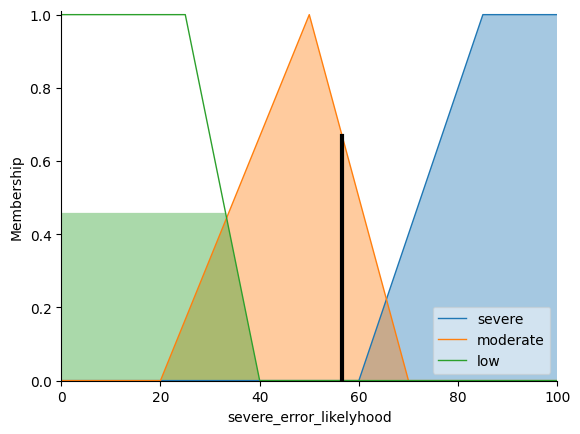

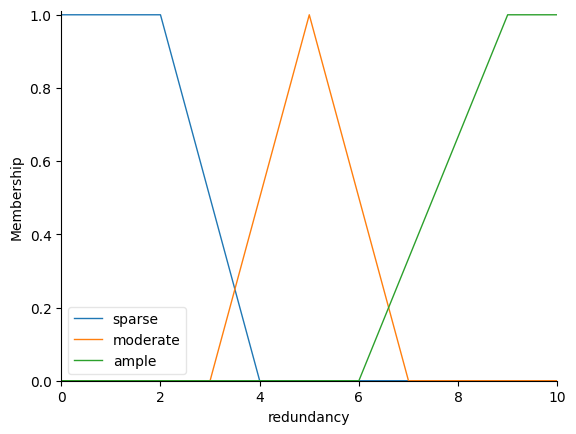

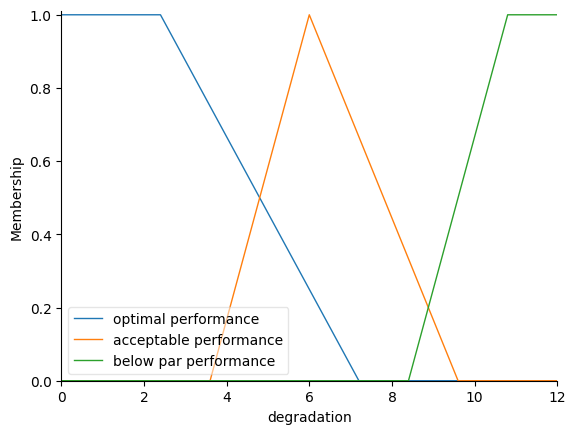

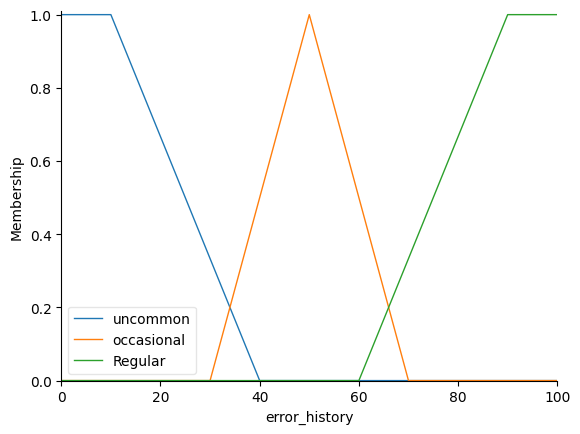

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import membership as mf
import matplotlib.pyplot as plt

# defining the input variables:
degradation = ctrl.Antecedent(np.arange(0, 12.1, 0.1), 'degradation')    #10 years : 120 months
redundancy = ctrl.Antecedent(np.arange(0, 11, 1), 'redundancy')     #10 same files
error_history = ctrl.Antecedent(np.arange(0, 101, 1), 'error_history')   # no of errors occured


# define membership function for 'degradation'
degradation['optimal performance'] = mf.trapmf(degradation.universe, [0, 0, 2.4, 7.2])
degradation['acceptable performance'] = mf.trimf(degradation.universe, [3.6, 6, 9.6])
degradation['below par performance'] = mf.trapmf(degradation.universe, [8.4, 10.8, 12, 12])
# displaying the degradation membership function plot
# degradation.view()


#define membership function for 'error history'
redundancy['sparse'] = mf.trapmf(redundancy.universe, [0, 0, 2, 4])
redundancy['moderate'] = mf.trimf(redundancy.universe, [3, 5, 7])
redundancy['ample'] = mf.trapmf(redundancy.universe, [6, 9, 10, 10])
# displaying the redundancy membership function plot
# redundancy.view()

#defining membership function for 'error history'
error_history['uncommon'] = mf.trapmf(error_history.universe, [0, 0, 10, 40])
error_history['occasional'] = mf.trimf(error_history.universe, [30, 50, 70])
error_history['Regular'] = mf.trapmf(error_history.universe, [60,90,100,100])
# displaying the error_history membership function plot
# error_history.view()

# define the outputs variable
severe_error_likelyhood = ctrl.Consequent(np.arange(0,101,1), 'severe_error_likelyhood')
severe_error_likelyhood['severe'] = fuzz.trapmf(severe_error_likelyhood.universe, [60, 85, 100, 100])
severe_error_likelyhood['moderate'] = fuzz.trimf(severe_error_likelyhood.universe, [20, 50, 70])
severe_error_likelyhood['low'] = fuzz.trapmf(severe_error_likelyhood.universe, [0, 0, 25, 40])


rule1 = ctrl.Rule((error_history['Regular'] | degradation['below par performance'] | redundancy['sparse'] ) & ~redundancy['ample'], severe_error_likelyhood['severe'])   #low redundency doesnt hugely  that it is an severe error
rule2 = ctrl.Rule(error_history['occasional'] | degradation['acceptable performance'] | ~redundancy['moderate'], severe_error_likelyhood['moderate'])
rule3 = ctrl.Rule(error_history['uncommon'] | degradation['optimal performance'] | redundancy['ample'], severe_error_likelyhood['low'])

# Create the control system
error_likelyhood_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
error_likelyhood_detect = ctrl.ControlSystemSimulation(error_likelyhood_ctrl)

# Getting user input for crisp values
print("Enter the following required values to find the severe error-likelyhood percentage and mitgation suggesstions.\n Make sure to enter values belonging to the required range. ")
redundancy_level = int(input("Enter no of duplicate files(data redundancy) [0 - 10]: "))
degradation_level = int(input("Enter how old is the system(degradation level) ([0 - 120]: "))
err_hist = int(input("No of errors occured in the past(error history) [0-100]: "))

# Computing severe_error_likelyhood by assigning user input crisp values
error_likelyhood_detect.input['redundancy'] = redundancy_level
error_likelyhood_detect.input['degradation'] = degradation_level / 10
error_likelyhood_detect.input['error_history'] = err_hist
error_likelyhood_detect.compute()


# Get defuzzified result
output_result = int(error_likelyhood_detect.output['severe_error_likelyhood'])
print(f"\nSevere Error Likelyhood: {output_result}%")

#TODO defining the mitigation plan


# Ask user if they want to view the plots
choice = input("Do you want to view the fuzzy value plots? (yes/no): ").lower()

if choice == 'yes':
  severe_error_likelyhood.view(sim=error_likelyhood_detect)

  # Plot each membership function
  redundancy.view()
  degradation.view()
  error_history.view()




In [ ]:

10311